In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from midiutil import MIDIFile

%matplotlib inline

In [17]:
#My Plan is to take a 3D brownian Motion. 

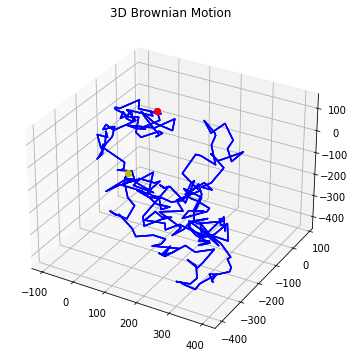

In [18]:
from pylab import show
from math import sqrt
from scipy.stats import norm
from mpl_toolkits.mplot3d.axes3d import Axes3D

def brownian(x0, n, dt, delta, out=None):
   #  n : The number of steps to take.
   #  dt : time step
   #  delta : "speed" of motion
   #  out :If `out` is NOT None, it specifies the array in which to put the
   #      result.  If `out` is None, a new numpy array is created and returned.

    x0 = np.asarray(x0) #I.C
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt)) #generate n numbers for sample
    
    if out is None: #create out array
        out = np.empty(r.shape)
        
    np.cumsum(r, axis=-1, out=out) #cumulative sum for random variables
    out += np.expand_dims(x0, axis=-1) #initial condition.
    
    return out

fig = plt.figure(1, figsize=(8,6)) #prepare plot
ax = fig.add_subplot(projection='3d')
    
delta = 50 # The Wiener process parameter.
T = 90 #Time
N = 240 #Number of steps. #180/3sec per bar = 60 measures each measure with 8 points = 60*8
dt = T/N
m = 3 #Number of "lines"

x = np.empty((m,N+1))# Create an empty array to store the realizations.
x[:, 0]= 0# Initial values of x.

brownian(x[:,0], N, dt, delta, out=x[:,1:]) 

t = np.linspace(0.0, T, N+1)

for i in range(m):
    xdata, ydata, zdata = x[:3,:]
    ax.plot3D(xdata, ydata, zdata, color='b')
    ax.plot3D(xdata[0], ydata[0], zdata[0], 'ro') #starts here 
    ax.plot3D(xdata[-1], ydata[-1], zdata[-1], 'yo') #Ends here
    ax.set_title('3D Brownian Motion')

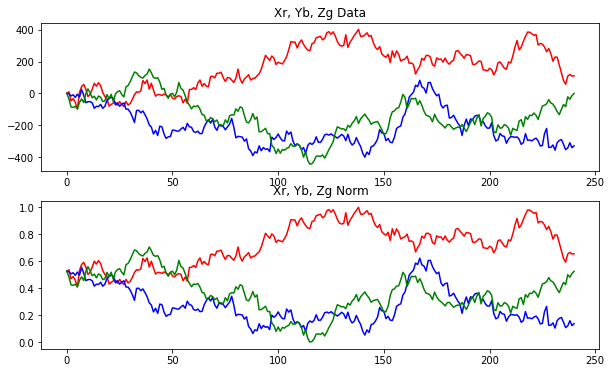

In [19]:
#Look at individual plots! Norm The data
data_array = np.vstack((xdata , ydata, zdata))
dmax, dmin = data_array.max(), data_array.min()
data_array = (data_array - dmin)/(dmax - dmin)

fig, ax = plt.subplots(2, figsize=(10,6))
ax[0].set_title('Xr, Yb, Zg Data')
ax[0].plot(xdata, 'r')
ax[0].plot(ydata, 'b')
ax[0].plot(zdata, 'g')

ax[1].set_title('Xr, Yb, Zg Norm')
ax[1].plot(data_array[0], 'r')
ax[1].plot(data_array[1], 'b')
ax[1].plot(data_array[2], 'g')

Text(0.5, 0, 'Projection through x axis')

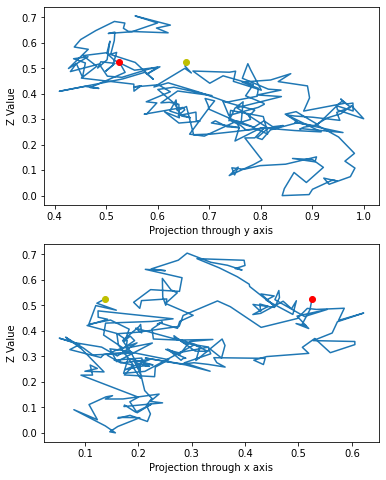

In [20]:
fig, ax = plt.subplots(2, figsize=(6,8))

ax[0].plot(data_array[0], data_array[2])
ax[0].plot(data_array[0][0], data_array[2][0], 'ro')
ax[0].plot(data_array[0][-1], data_array[2][-1], 'yo')
ax[0].set_ylabel('Z Value')
ax[0].set_xlabel('Projection through y axis')

ax[1].plot(data_array[1], data_array[2])
ax[1].plot(data_array[1][0], data_array[2][0], 'ro')
ax[1].plot(data_array[1][-1], data_array[2][-1], 'yo')
ax[1].set_ylabel('Z Value')
ax[1].set_xlabel('Projection through x axis')

In [21]:
def set_midi_notes_for_mode(start_note, octaves, mode):
    #Returns a list of Diatonic Notes in the Mode
    #Returns a 2nd list of Accidental Notes not in the Mode
    
    modes = {
    'ionian':[2,2,1,2,2,2,1],
    'dorian':[2,1,2,2,2,1,2],
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
    }
    
    diatonics = []
    accidentals = []
    
    for octave in range(octaves):
        note = start_note + (12*octave) #first octave = 0, 2nd=1, etc
        
        for step in modes[mode]:
            diatonics.append(note)
            note = note + step
    last_note = start_note + (octaves*12) #sets last note
    diatonics.append(last_note) #there must be a better way to do this
    
    for i in range(octaves*12): #in range of all semitones
        note = start_note + i
        
        if note not in diatonics:
            accidentals.append(note)
            
    return diatonics, accidentals

start_note = 48 #F2 #Change this for a different starting notw
octaves = 3
mode = 'ionian'
diatonics, accidentals = set_midi_notes_for_mode(start_note, octaves, mode)
print('New Diatonics:', diatonics)
chromatics = np.arange(start_note,start_note+(12*octaves)+1,1)
print('Chromatics:',  chromatics)

New Diatonics: [48, 50, 52, 53, 55, 57, 59, 60, 62, 64, 65, 67, 69, 71, 72, 74, 76, 77, 79, 81, 83, 84]
Chromatics: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84]


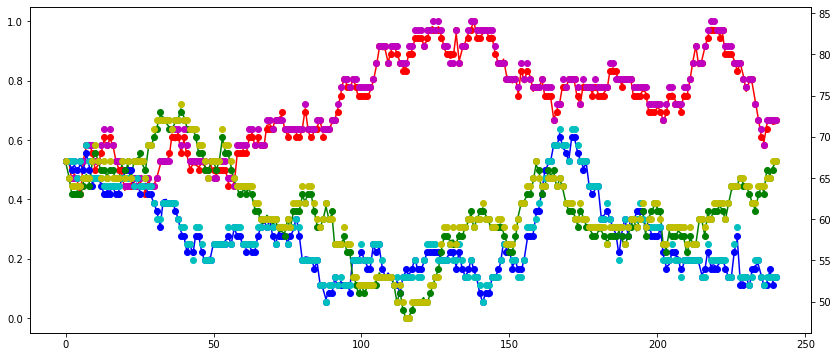

In [22]:
# Getting notes
x_chrom = np.interp(data_array[0], (np.min(data_array), np.max(data_array)), (0, len(chromatics)-1)) 
y_chrom = np.interp(data_array[1], (np.min(data_array), np.max(data_array)), (0, len(chromatics)-1)) 
z_chrom = np.interp(data_array[2], (np.min(data_array), np.max(data_array)), (0, len(chromatics)-1))     

x_diat = np.interp(data_array[0], (np.min(data_array), np.max(data_array)), (0, len(diatonics)-1)) 
y_diat = np.interp(data_array[1], (np.min(data_array), np.max(data_array)), (0, len(diatonics)-1)) 
z_diat = np.interp(data_array[2], (np.min(data_array), np.max(data_array)), (0, len(diatonics)-1))   

for i in range(len(data_array[0])):
    x_note = int(np.round(x_chrom[i]))
    y_note = int(np.round(y_chrom[i]))
    z_note = int(np.round(z_chrom[i]))
    x_chrom[i] = chromatics[x_note]
    y_chrom[i] = chromatics[y_note]
    z_chrom[i] = chromatics[z_note]
    
    x_note2 = int(np.round(x_diat[i]))
    y_note2 = int(np.round(y_diat[i]))
    z_note2 = int(np.round(z_diat[i]))
    x_diat[i] = diatonics[x_note2]
    y_diat[i] = diatonics[y_note2]
    z_diat[i] = diatonics[z_note2]
        


        
fig, ax = plt.subplots(figsize=(14,6))
           
ax.plot(data_array[0], 'r')
ax.plot(data_array[1], 'b')
ax.plot(data_array[2], 'g')
ax2 = ax.twinx()
ax2.plot(x_chrom, 'ro')
ax2.plot(y_chrom, 'bo')
ax2.plot(z_chrom, 'go')

ax2.plot(x_diat, 'mo')
ax2.plot(y_diat, 'co')
ax2.plot(z_diat, 'yo')

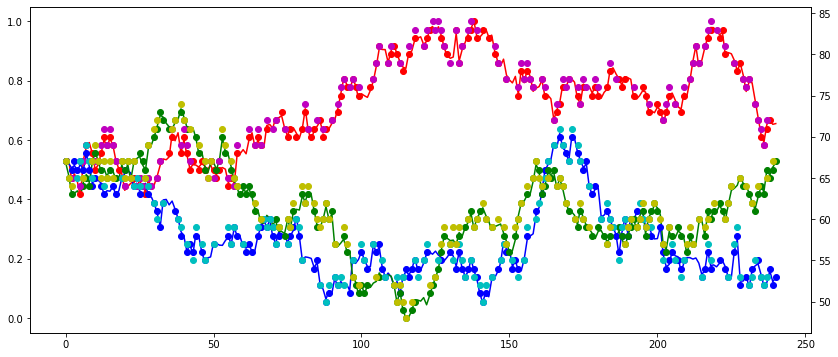

In [23]:
#Now I have a way to decide between Chromatics and diatonics whenever I hit a note.
#whats it look like if we delete repeating notes?
def del_repeat_points(nparr1):
    nparray = nparr1.copy()
    for point in range(1, len(nparray)):
        
        if nparray[point] == nparray[point - 1]: #If the point is the same as the one befor         
            nparray[point] = np.nan # Make the current point nan.
        
        elif np.isnan(nparray[point - 1]) == True: # if the point before is nan
                backpoint = point-1
                
                while np.isnan(nparray[backpoint]) == True: # while the point before is nan
                    backpoint -= 1 #move back in the list
            
                    if nparray[backpoint] == nparray[point]: #if the backpoint equals the current then
                        nparray[point] = np.nan
    return nparray

x_chrom2 = del_repeat_points(x_chrom)
y_chrom2 = del_repeat_points(y_chrom)
z_chrom2 = del_repeat_points(z_chrom)

x_diat2 = del_repeat_points(x_diat)
y_diat2 = del_repeat_points(y_diat)
z_diat2 = del_repeat_points(z_diat)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(data_array[0], 'r')
ax.plot(data_array[1], 'b')
ax.plot(data_array[2], 'g')
ax2 = ax.twinx()
ax2.plot(x_chrom2, 'ro')
ax2.plot(y_chrom2, 'bo')
ax2.plot(z_chrom2, 'go')

ax2.plot(x_diat2, 'mo')
ax2.plot(y_diat2, 'co')
ax2.plot(z_diat2, 'yo')

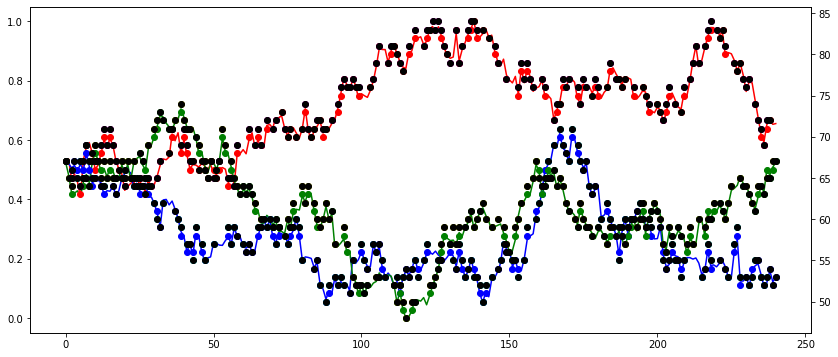

In [24]:
# A method for zipping the two lists together. Idk why but I thought it was cool.

x_comb = np.empty([len(x_diat2)])
#I'll have you know. I consider this loop to be extremely clever.
for i in range(len(x_comb)):
    if x_diat2[i] == x_chrom2[i]: #Nan Nan, x x
        x_comb[i] = x_diat2[i]  
    elif x_diat2[i] != x_chrom2[i] and np.isnan(x_diat2[i]) == True:
        x_comb[i] = x_chrom2[i]
    else:
        x_comb[i] = x_diat2[i]

def zip_notes(note_array1, note_array2):
    
    return_array = np.empty([len(note_array1)])
    
    for i in range(len(return_array)):
        if note_array1[i] == note_array2[i]: #Nan Nan, x x
            return_array[i] = note_array1[i]  
            
        elif note_array1[i] != note_array2[i] and np.isnan(note_array1[i]) == True: #? x -> nan x
            return_array[i] = note_array2[i]
        else:
            return_array[i] = note_array1[i]
    return return_array

y_comb = zip_notes(y_diat2, y_chrom2)
z_comb = zip_notes(z_diat2, z_chrom2)

fig, ax = plt.subplots(1, figsize=(14,6))
ax.plot(data_array[0], 'r')
ax.plot(data_array[1], 'b')
ax.plot(data_array[2], 'g')
ax2 = ax.twinx()

ax2.plot(x_chrom2, 'ro')
ax2.plot(y_chrom2, 'bo')
ax2.plot(z_chrom2, 'go')

ax2.plot(x_diat2, 'mo')
ax2.plot(y_diat2, 'co')
ax2.plot(z_diat2, 'yo')

ax2.plot(x_comb, 'ko')
ax2.plot(y_comb, 'ko')
ax2.plot(z_comb, 'ko')

[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0.]


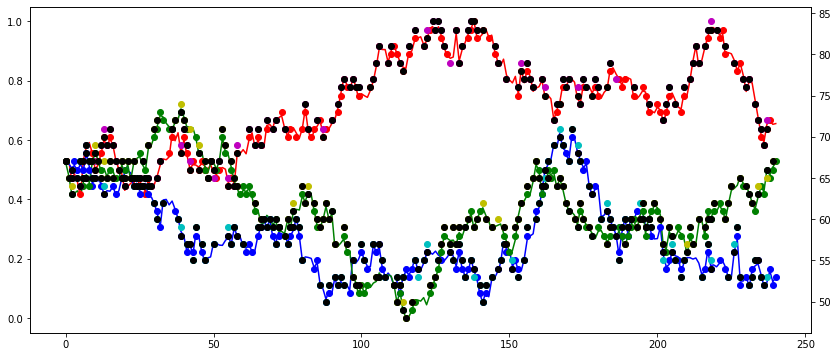

In [26]:
#Now for a version that uses a conditional switch to pick between them.
latcher_boi = np.zeros(len(x_diat2))
latcher_boi[2::8]=1
latcher_boi[7::16]=1
latcher_boi[13::32]=1

print(latcher_boi)
    
def note_latch(latch_array, array1, array2):
    
    out = np.empty([len(latch_array)])

    for i in range(len(latch_array)):
        if latch_array[i] == 0:
            out[i] = array1[i]
        elif latch_array[i] == 1:
            out[i] = array2[i]
            
    return out

x_rand = note_latch(latcher_boi, x_diat2, x_chrom2)
y_rand = note_latch(latcher_boi, y_diat2, y_chrom2)
z_rand = note_latch(latcher_boi, z_diat2, z_chrom2)

fig, ax = plt.subplots(1, figsize=(14,6))
ax.plot(data_array[0], 'r')
ax.plot(data_array[1], 'b')
ax.plot(data_array[2], 'g')
ax2 = ax.twinx()
ax2.plot(x_chrom2, 'ro')
ax2.plot(y_chrom2, 'bo')
ax2.plot(z_chrom2, 'go')
ax2.plot(x_diat2, 'mo')
ax2.plot(y_diat2, 'co')
ax2.plot(z_diat2, 'yo')

ax2.plot(x_rand, 'ko')
ax2.plot(y_rand, 'ko')
ax2.plot(z_rand, 'ko')

In [27]:
#Need a better midi write function that can handle the nan setting

def nan_handle(midifile, bpm, note_duration, midi_data, miditime_start):
    #Writes as usual but takes miditime as a parameter. Returns the time and the midifile
    
    track = 0
    channel = 0
    velocity = 100 #Constant for now
    miditime = miditime_start
    
    mymidi = midifile
    moving_duration = note_duration
    write_note = midi_data[0]
    
    for note in range(len(midi_data)):
        # If the current note is nan,
        # make the duration of the note to be written twice as long
        # If the note is not nan
        # write the last note, for moving duration, at the miditime
        # move the miditime forward
        # reset the duration
        # #make the write note, the current note.
        if np.isnan(midi_data[note]) == True:
            moving_duration += note_duration
            
        elif np.isnan(midi_data[note]) == False:
            mymidi.addNote(track, channel, int(write_note), miditime, moving_duration, velocity)
            miditime += moving_duration
            moving_duration = note_duration
            write_note = midi_data[note]
    mymidi.addNote(track, channel, int(write_note), miditime, moving_duration, velocity)
    miditime += moving_duration
    
    return mymidi

In [28]:
#Setting up the group writer with a dict

all_midi = {
    'x_chrom2': x_chrom2,
    'x_diat2': x_diat2,
    'x_latch': x_rand,
    'y_chrom2': y_chrom2,
    'y_diat2': y_diat2,
    'y_latch': y_rand,
    'z_chrom2': z_chrom2,
    'z_diat2': z_diat2,
    'z_latch': z_rand,
}

#Set Up the constants
bpm = 81           
note_duration = 960 #quarter Notes, 1920Half Notes, 480eighth Notes


for i in all_midi.keys():
    miditime = 0
    midifile = MIDIFile(1, eventtime_is_ticks=True)
    midifile.addTempo(0, miditime, bpm)
    midifile = nan_handle(midifile, bpm, note_duration, all_midi[i] , miditime)         

                        
    with open("MidiFiles/{}.mid".format(i), "wb") as output_file:
        midifile.writeFile(output_file)